In [133]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph

from cknn import cknneighbors_graph
import scipy
import scipy.sparse as sparse
import numpy as np
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist, squareform
import pandas as pd
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.utils import shuffle
import random as rand
from sklearn import preprocessing

from sklearn.manifold import SpectralEmbedding
from sklearn.model_selection import train_test_split
import markov_clustering as mc


from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.metrics.pairwise import pairwise_distances
from graphs import Graph

import networkx as nx 
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score





import utility_journal as ut

# IMPORT DATA -> IRIS

In [2]:
path_uci = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris_df = pd.read_csv(path_uci,header=None)

col_names =['sepal_length','sepal_width','petal_length','petal_width','type' ]

iris_df.columns = col_names

X = iris_df.iloc[:,0:4]
y = iris_df.iloc[:,-1]
n_samples, n_features = X.shape
n_neighbors = 3
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

## GAUSSIAN MIXTURE MODEL

In [3]:


scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
35,-1.021849,0.337848,-1.455004,-1.312977
86,1.038005,0.106445,0.535296,0.396172
141,1.280340,0.106445,0.762759,1.447956
81,-0.416010,-1.513375,-0.033361,-0.261193
122,2.249683,-0.587764,1.672610,1.053537


In [4]:

gmm = GaussianMixture(n_components=3)
gmm.fit(X_scaled)
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [7]:

ARI_GMM = adjusted_rand_score(y, y_cluster_gmm)
ARI_GMM

0.9038742317748124

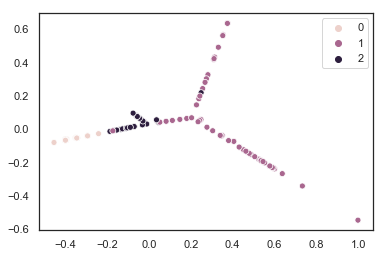

In [134]:
sns.scatterplot(X[:, 0], X[:, 1], hue = y_cluster_gmm)

## CKNN for $k = 10$ graphic representation + Markov Stability

### Cknn representation

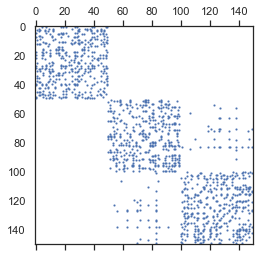

In [54]:


scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
kng= ut.cknneighbors_graph(X, 10, delta=1.0, t='inf')
plt.spy(kng, markersize=1)
plt.show()

### Markov Stability + CKNN

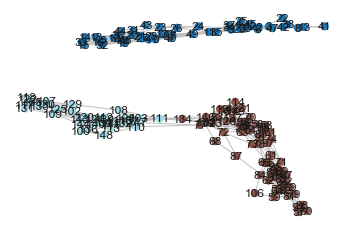

In [57]:
kng=scipy.sparse.csr_matrix.toarray(kng)
result = mc.run_mcl(kng, inflation = 1.2)
clusters = mc.get_clusters(result)
# Draw clusters
mc.draw_graph(kng, clusters, node_size=50, with_labels=True, edge_color="silver")

## Minimum Spanning Tree : Perturbed Minimum Spanning Tree 

### MST representation

<function matplotlib.pyplot.show(*args, **kw)>

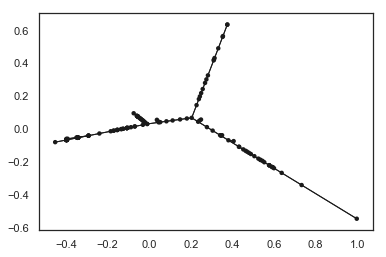

In [88]:
mst=ut.mst(X)
mst.num_vertices()
mst.num_edges()
mst.symmetrize(method='max')
X = mst.isomap(num_dims=2)
mst.plot(X)

### PMST representation

<function matplotlib.pyplot.show(*args, **kw)>

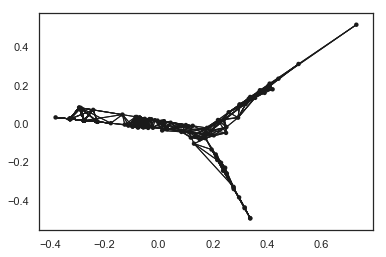

In [87]:
pmst=ut.perturbed_mst(X)
pmst.num_vertices()
pmst.num_edges()
pmst.symmetrize(method='max')
X = pmst.isomap(num_dims=2)
pmst.plot(X)

## SPECTRAL CLUSTERING

In [121]:
clustering = SpectralClustering(n_clusters=3, assign_labels="discretize",
         random_state=0).fit(X)
pred_spec=clustering.labels_
clustering.fit(X)
clustering.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2], dtype=int64)

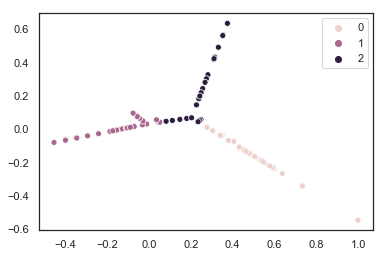

In [132]:
sns.scatterplot(X[:, 0], X[:, 1], hue = pred_spec)

In [122]:

ARI_SPEC_G = adjusted_rand_score(y, pred_spec)
ARI_SPEC_G

0.40063890562913096